##SIMULACION DEL CAMPO MAGNETICO DE UN SOLENOIDE

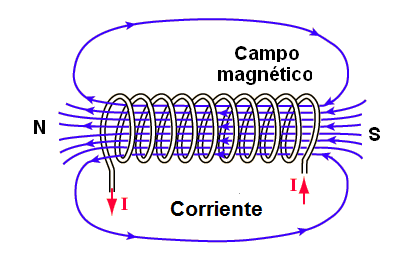

La **Ley de Biot-Savart** establece que el campo magnético diferencial $ d\mathbf{B} $ debido a un elemento de corriente $ d\mathbf{l} $ es:

$$
d\mathbf{B} = \frac{\mu_0}{4\pi} \frac{I \, d\mathbf{l} \times \hat{\mathbf{r}}}{r^2}
$$

donde:

- $ \mu_0 $ es la permeabilidad del vacío,  
- $ I $ es la corriente en el conductor,  
- $ d\mathbf{l} $ es el elemento diferencial de longitud del conductor con corriente,  
- $ \hat{\mathbf{r}} $ es el vector unitario desde el elemento de corriente al punto donde se mide el campo,  
- $ r $ es la distancia desde el elemento de corriente al punto de observación.


In [ ]:
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 10)
y = np.linspace(-0.3, 0.3, 10)
z = np.linspace(-1.2, 1.2, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente que se desplaza en direccion horaria
                                                                             # (invertimos el signo en las componentes para que la corriente vaya en direccion antihoraria)
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario para evitar división por cero
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Convertimos los datos a listas para Plotly
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='sunset', showscale=True
)


# Crear la figura interactiva
fig = go.Figure(data=[quiver_data])
fig.update_layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    title='Campo Magnético de un Solenoide (Usando Biot-Savart)'
)

# Mostrar la figura interactiva
fig.show()


100%|██████████| 3000/3000 [00:58<00:00, 50.95it/s]


##Cambiado parametros (numero de espiras y corriente)

In [ ]:
# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 100  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 10)
y = np.linspace(-0.3, 0.3, 10)
z = np.linspace(-1.2, 1.2, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 50)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente que se desplaza en direccion horaria
                                                                             # (invertimos el signo en las componentes para que la corriente vaya en direccion antihoraria)
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario para evitar división por cero
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Convertimos los datos a listas para Plotly
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='sunset', showscale=True
)


# Crear la figura interactiva
fig = go.Figure(data=[quiver_data])
fig.update_layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    title='Campo Magnético de un Solenoide (Usando Biot-Savart)'
)

# Mostrar la figura interactiva
fig.show()


100%|██████████| 100/100 [00:03<00:00, 33.01it/s]


In [ ]:
# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 5  # Corriente en amperios
N = 1000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 10)
y = np.linspace(-0.3, 0.3, 10)
z = np.linspace(-1.2, 1.2, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente que se desplaza en direccion horaria
                                                                             # (invertimos el signo en las componentes para que la corriente vaya en direccion antihoraria)
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario para evitar división por cero
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Convertimos los datos a listas para Plotly
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='sunset', showscale=True
)


# Crear la figura interactiva
fig = go.Figure(data=[quiver_data])
fig.update_layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    title='Campo Magnético de un Solenoide (Usando Biot-Savart)'
)

# Mostrar la figura interactiva
fig.show()


100%|██████████| 1000/1000 [00:22<00:00, 44.93it/s]


In [ ]:
# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 100  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 10)
y = np.linspace(-0.3, 0.3, 10)
z = np.linspace(-1.2, 1.2, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 40)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente que se desplaza en direccion horaria
                                                                             # (invertimos el signo en las componentes para que la corriente vaya en direccion antihoraria)
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario para evitar división por cero
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Convertimos los datos a listas para Plotly
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='sunset', showscale=True
)


# Crear la figura interactiva
fig = go.Figure(data=[quiver_data])
fig.update_layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    title='Campo Magnético de un Solenoide (Usando Biot-Savart)'
)

# Mostrar la figura interactiva
fig.show()

100%|██████████| 100/100 [00:00<00:00, 142.20it/s]


#ENCONTRANDO LOS VALORES DE CAMPO EN LA ESPIRA CENTRAL

La **Ley de Ampère** aplicada a un solenoide nos permite calcular el campo magnético en su interior. Para un solenoide ideal con $ n $ espiras por unidad de longitud y una corriente $ I $, el campo magnético dentro del solenoide es:

$$
B = \mu_0 n I
$$

donde:

- $ B $ es la magnitud del campo magnético dentro del solenoide,  
- $ \mu_0 $ es la permeabilidad del vacío,  
- $ n $ es el número de espiras por unidad de longitud del solenoide,  
- $ I $ es la corriente que circula por el solenoide.  


100%|██████████| 3000/3000 [00:25<00:00, 118.24it/s]


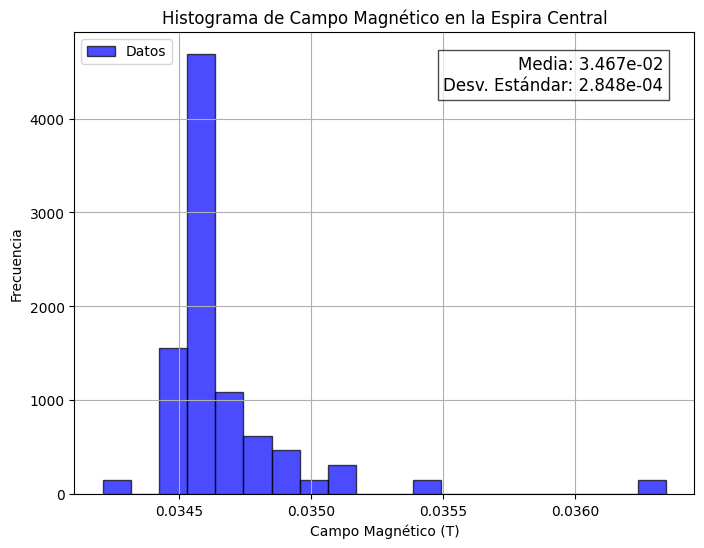

Campo magnetico teorico 0.0353 T
Campo magnetico simulado promedio dentro del solenoide:  0.0347 T


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el plano de la espira central
x = np.linspace(-0.3, 0.3, 20)
y = np.linspace(-0.3, 0.3, 20)
z_central = 0  # Espira central en z = 0
X, Y = np.meshgrid(x, y)
Z = np.full_like(X, z_central)

# Filtramos solo los puntos dentro del radio del solenoide
mask = X**2 + Y**2 < R**2
X, Y, Z = X[mask], Y[mask], Z[mask]

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]
for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])
        r_mag = np.linalg.norm(r_vec, axis=0)
        r_hat = r_vec / (r_mag + 1e-9)
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Campo magnetico teorico
B_Teorico = mu_0 *I *(N/L)

# Magnitud del campo magnético dentro del solenoide
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Calcular media y desviación estándar
mean_B = np.mean(B_magnitude)
sigma_B = np.std(B_magnitude)

# Crear el histograma de frecuencias
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(B_magnitude, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Datos')


# Mostrar media y desviación estándar en la esquina superior derecha
plt.text(0.95, 0.95, f'Media: {mean_B:.3e}\nDesv. Estándar: {sigma_B:.3e}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Campo Magnético (T)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Campo Magnético en la Espira Central')
plt.legend()
plt.grid(True)
plt.show()

print('Campo magnetico teorico', np.round(B_Teorico,4),'T')
print('Campo magnetico simulado promedio dentro del solenoide: ', np.round(mean_B,4),'T')



100%|██████████| 3000/3000 [00:26<00:00, 111.38it/s]


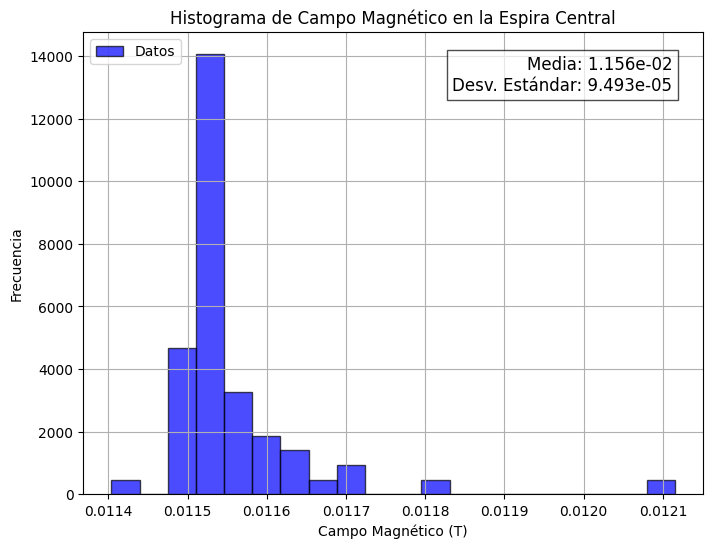

Campo magnetico teorico 0.0118 T
Campo magnetico simulado promedio dentro del solenoide:  0.0116 T


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 5  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el plano de la espira central
x = np.linspace(-0.3, 0.3, 20)
y = np.linspace(-0.3, 0.3, 20)
z_central = 0  # Espira central en z = 0
X, Y = np.meshgrid(x, y)
Z = np.full_like(X, z_central)

# Filtramos solo los puntos dentro del radio del solenoide
mask = X**2 + Y**2 < R**2
X, Y, Z = X[mask], Y[mask], Z[mask]

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]
for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])
        r_mag = np.linalg.norm(r_vec, axis=0)
        r_hat = r_vec / (r_mag + 1e-9)
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Campo magnetico teorico
B_Teorico = mu_0 *I *(N/L)

# Magnitud del campo magnético dentro del solenoide
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Calcular media y desviación estándar
mean_B2 = np.mean(B_magnitude)
sigma_B2 = np.std(B_magnitude)

# Crear el histograma de frecuencias
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(B_magnitude, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Datos')


# Mostrar media y desviación estándar en la esquina superior derecha
plt.text(0.95, 0.95, f'Media: {mean_B2:.3e}\nDesv. Estándar: {sigma_B2:.3e}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Campo Magnético (T)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Campo Magnético en la Espira Central')
plt.legend()
plt.grid(True)
plt.show()

print('Campo magnetico teorico', np.round(B_Teorico,4),'T')
print('Campo magnetico simulado promedio dentro del solenoide: ', np.round(mean_B2,4),'T')



100%|██████████| 100/100 [00:01<00:00, 83.42it/s]


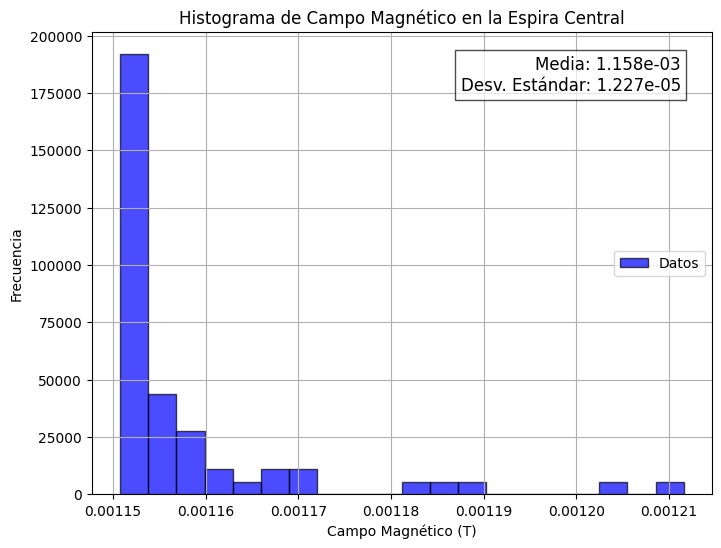

Campo magnetico teorico 0.0012 T
Campo magnetico simulado promedio dentro del solenoide:  0.0012 T


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 100  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el plano de la espira central
x = np.linspace(-0.3, 0.3, 20)
y = np.linspace(-0.3, 0.3, 20)
z_central = 0  # Espira central en z = 0
X, Y = np.meshgrid(x, y)
Z = np.full_like(X, z_central)

# Filtramos solo los puntos dentro del radio del solenoide
mask = X**2 + Y**2 < R**2
X, Y, Z = X[mask], Y[mask], Z[mask]

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]
for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])
        r_mag = np.linalg.norm(r_vec, axis=0)
        r_hat = r_vec / (r_mag + 1e-9)
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Campo magnetico teorico
B_Teorico = mu_0 *I *(N/L)

# Magnitud del campo magnético dentro del solenoide
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Calcular media y desviación estándar
mean_B3 = np.mean(B_magnitude)
sigma_B3 = np.std(B_magnitude)

# Crear el histograma de frecuencias
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(B_magnitude, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Datos')


# Mostrar media y desviación estándar en la esquina superior derecha
plt.text(0.95, 0.95, f'Media: {mean_B3:.3e}\nDesv. Estándar: {sigma_B3:.3e}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Campo Magnético (T)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Campo Magnético en la Espira Central')
plt.legend()
plt.grid(True)
plt.show()

print('Campo magnetico teorico', np.round(B_Teorico,4),'T')
print('Campo magnetico simulado promedio dentro del solenoide: ', np.round(mean_B3,4),'T')


100%|██████████| 100/100 [00:00<00:00, 330.56it/s]


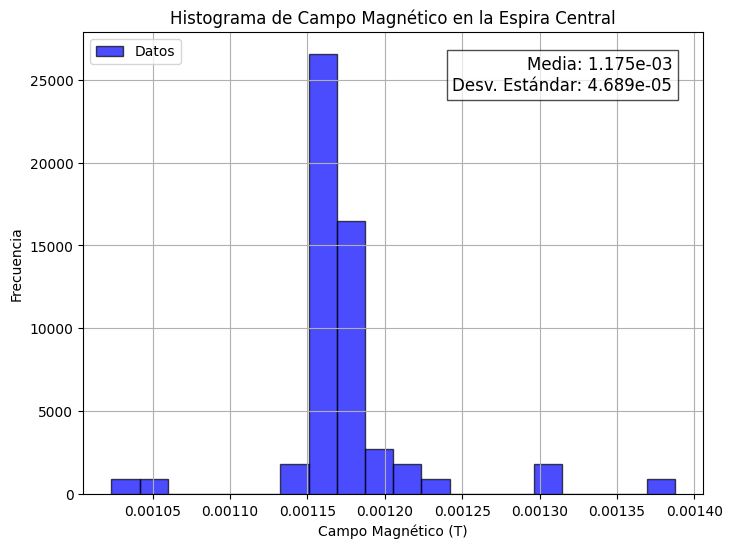

Campo magnetico teorico 0.0012 T
Campo magnetico simulado promedio dentro del solenoide:  0.0012 T


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 100  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
R = 0.2  # Radio del solenoide en metros

# Generamos una malla de puntos en el plano de la espira central
x = np.linspace(-0.3, 0.3, 20)
y = np.linspace(-0.3, 0.3, 20)
z_central = 0  # Espira central en z = 0
X, Y = np.meshgrid(x, y)
Z = np.full_like(X, z_central)

# Filtramos solo los puntos dentro del radio del solenoide
mask = X**2 + Y**2 < R**2
X, Y, Z = X[mask], Y[mask], Z[mask]

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 40)
dtheta = theta[1] - theta[0]
for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])
        r_mag = np.linalg.norm(r_vec, axis=0)
        r_hat = r_vec / (r_mag + 1e-9)
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Campo magnetico teorico
B_Teorico = mu_0 *I *(N/L)

# Magnitud del campo magnético dentro del solenoide
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Calcular media y desviación estándar
mean_B4 = np.mean(B_magnitude)
sigma_B4 = np.std(B_magnitude)

# Crear el histograma de frecuencias
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(B_magnitude, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Datos')


# Mostrar media y desviación estándar en la esquina superior derecha
plt.text(0.95, 0.95, f'Media: {mean_B4:.3e}\nDesv. Estándar: {sigma_B4:.3e}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Campo Magnético (T)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Campo Magnético en la Espira Central')
plt.legend()
plt.grid(True)
plt.show()

print('Campo magnetico teorico', np.round(B_Teorico,4),'T')
print('Campo magnetico simulado promedio dentro del solenoide: ', np.round(mean_B4,4),'T')

#mov helicoidal

##El radio de giro de la partícula es $ r_L = \frac{m v_{\perp}}{|q| B} $.


#(1) Para un radio de 0.15 metros

In [ ]:
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
n=N/L
R = 0.2  # Radio del solenoide en metros
q = 1.6e-19  # Carga de la partícula (Coulombs)
m = 9.11e-31  # Masa de la partícula (kg)

# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 15)
y = np.linspace(-0.3, 0.3, 15)
z = np.linspace(-1.1, 1.1, 15)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Crear la representación del campo magnético
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='Inferno', showscale=True, sizemode="scaled", sizeref=0.1
)

# Movimiento helicoidal de la partícula

vxy= 2.04*10**8

t = np.linspace(-9, 9, 150)  # Tiempo
B= mean_B2
RL= m/(q*B) * vxy
w= q*B/m

x_p = RL * np.cos(w*t)
y_p = RL * np.sin(w*t)
z_p = t / 100      # Movimiento en Z (ajustado para que llegue a z=1)


# Traza de la partícula en movimiento
particle_trace = go.Scatter3d(
    x=[], y=[], z=[],
    mode='markers',
    marker=dict(size=5, color='red')
)

# Crear los frames de animación
frames = [
    go.Frame(
        data=[
            go.Cone(
                x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
                colorscale='Inferno', showscale=True, sizemode="scaled", sizeref=0.1
            ),
            go.Scatter3d(x=[x_p[k]], y=[y_p[k]], z=[z_p[k]],
                         mode='markers',
                         marker=dict(size=5, color='red'))
        ]
    ) for k in range(len(t))
]

# Configurar el diseño de la figura
layout = go.Layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 50, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 50, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
             "label": "Pause", "method": "animate"}
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Crear la figura combinada
fig = go.Figure(data=[quiver_data, particle_trace], layout=layout, frames=frames)

# Mostrar la animación
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
n=N/L
R = 0.2  # Radio del solenoide en metros
q = 1.6e-19  # Carga de la partícula (Coulombs)
m = 9.11e-31  # Masa de la partícula (kg)
# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 15)
y = np.linspace(-0.3, 0.3, 15)
z = np.linspace(-1.1, 1.1, 15)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([np.sin(t) * R * dtheta, -np.cos(t) * R * dtheta, 0])  # Elemento de corriente
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Crear la representación del campo magnético
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='greens', showscale=True, sizemode="scaled", sizeref=0.1
)

# Movimiento helicoidal de la partícula

#vxy= np.sqrt(vx**2+vy**2)
vxy= 6.10*10**8

t = np.linspace(-9, 9, 150)  # Tiempo
B= mean_B
RL= m/(q*B) * vxy
w= q*B/m

x_p = RL * np.cos(w*t)  # Movimiento en X con el radio del solenoide
y_p = RL * np.sin(w*t)  # Movimiento en Y con el radio del solenoide
z_p = t / 10      # Movimiento en Z (ajustado para que llegue a z=1)


# Traza de la partícula en movimiento
particle_trace = go.Scatter3d(
    x=[], y=[], z=[],
    mode='markers',
    marker=dict(size=5, color='red')
)

# Crear los frames de animación
frames = [
    go.Frame(
        data=[
            go.Cone(
                x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
                colorscale='greens', showscale=True, sizemode="scaled", sizeref=0.1
            ),
            go.Scatter3d(x=[x_p[k]], y=[y_p[k]], z=[z_p[k]],
                         mode='markers',
                         marker=dict(size=5, color='red'))
        ]
    ) for k in range(len(t))
]

# Configurar el diseño de la figura
layout = go.Layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 50, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 50, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
             "label": "Pause", "method": "animate"}
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Crear la figura combinada
fig = go.Figure(data=[quiver_data, particle_trace], layout=layout, frames=frames)

# Mostrar la animación
fig.show()

#(2) para un radio de 0.10 metros

In [ ]:
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm

# Definimos constantes
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
I = 15  # Corriente en amperios
N = 3000  # Número de espiras
L = 1.6  # Longitud del solenoide en metros
n=N/L
R = 0.2  # Radio del solenoide en metros
q = 1.6e-19  # Carga de la partícula (Coulombs)
m = 9.11e-31  # Masa de la partícula (kg)
# Generamos una malla de puntos en el espacio donde calcularemos B
x = np.linspace(-0.3, 0.3, 15)
y = np.linspace(-0.3, 0.3, 15)
z = np.linspace(-1.1, 1.1, 15)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Inicializamos los componentes del campo magnético
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculamos el campo magnético usando Biot-Savart
theta = np.linspace(0, 2*np.pi, 100)
dtheta = theta[1] - theta[0]

for i in tqdm(range(N)):
    z0 = -L/2 + i * (L / N)  # Posición de la espira en z
    for t in theta:
        dl = np.array([-np.sin(t) * R * dtheta, np.cos(t) * R * dtheta, 0])  # Elemento de corriente
        r_vec = np.array([X - R*np.cos(t), Y - R*np.sin(t), Z - z0])  # Vector de posición
        r_mag = np.linalg.norm(r_vec, axis=0)  # Magnitud de r
        r_hat = r_vec / (r_mag + 1e-9)  # Vector unitario
        dB = (mu_0 * I / (4 * np.pi)) * np.cross(dl, r_hat, axis=0) / (r_mag**2 + 1e-9)  # Biot-Savart
        Bx += dB[0]
        By += dB[1]
        Bz += dB[2]

# Crear la representación del campo magnético
quiver_data = go.Cone(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
    colorscale='greens', showscale=True, sizemode="scaled", sizeref=0.1
)

# Movimiento helicoidal de la partícula

#vxy= np.sqrt(vx**2+vy**2)
vxy= 6.10*10**8

t = np.linspace(-9, 9, 150)  # Tiempo
t= np.flip(t)
B= mean_B
RL= m/(q*B) * vxy
w= q*B/m

x_p = RL * np.cos(w*t)  # Movimiento en X con el radio del solenoide
y_p = RL * np.sin(w*t)  # Movimiento en Y con el radio del solenoide
z_p = t / 10      # Movimiento en Z (ajustado para que llegue a z=1)


# Traza de la partícula en movimiento
particle_trace = go.Scatter3d(
    x=[], y=[], z=[],
    mode='markers',
    marker=dict(size=5, color='red')
)

# Crear los frames de animación
frames = [
    go.Frame(
        data=[
            go.Cone(
                x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                u=Bx.flatten(), v=By.flatten(), w=Bz.flatten(),
                colorscale='greens', showscale=True, sizemode="scaled", sizeref=0.1
            ),
            go.Scatter3d(x=[x_p[k]], y=[y_p[k]], z=[z_p[k]],
                         mode='markers',
                         marker=dict(size=5, color='red'))
        ]
    ) for k in range(len(t))
]

# Configurar el diseño de la figura
layout = go.Layout(
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)'
    ),
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 50, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 50, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
             "label": "Pause", "method": "animate"}
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Crear la figura combinada
fig = go.Figure(data=[quiver_data, particle_trace], layout=layout, frames=frames)

# Mostrar la animación
fig.show()